<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/Sharoff_Lyashevskaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Загрузка TSV файла в DataFrame
data = pd.read_csv('freqrnc2011.csv', sep='\t')

# Проверка доступных названий колонок
print(data.columns)

# Замените 'YourColumnName' на имя колонки с частеречными тегами
unique_pos = data['PoS'].unique()

# Вывод уникальных значений
for pos in unique_pos:
    print(pos)

Index(['Lemma', 'PoS', 'Freq(ipm)', 'R', 'D', 'Doc'], dtype='object')
conj
intj
part
s
s.PROP
a
v
adv
spro
pr
num
apro
advpro
anum


In [1]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9a5caf0ca8dd9dbeeb8f67688f1ee6d622542cf7937fcdf975967756500b517f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


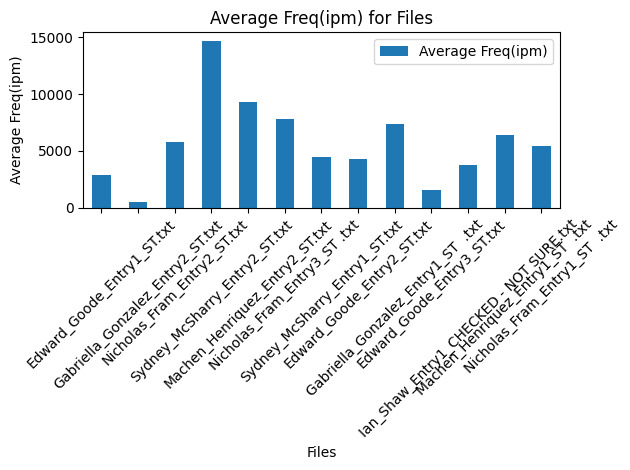

In [2]:
import os
import pandas as pd
import pymorphy2
import matplotlib.pyplot as plt

# Создание экземпляра анализатора pymorphy2
morph = pymorphy2.MorphAnalyzer()

# Путь к папке с txt-файлами
folder_path = '/content/Students_texts/'

# Загрузка данных из CSV файла
csv_path = 'freqrnc2011.csv'
freq_data = pd.read_csv(csv_path, sep='\t', encoding='utf-8')

# Словарь для соответствия частей речи
pos_mapping = {
    'conj': 'CONJ',
    'intj': 'INTJ',
    'part': 'PRCL',
    's': 'NOUN',
    's.PROP': 'NOUN',
    'a': 'ADJF',
    'v': 'VERB',
    'adv': 'ADVB',
    'spro': 'NPRO',
    'pr': 'PREP',
    'num': 'NUMR',
    'apro': 'ADJF',
    'advpro': 'ADVB',
    'anum': 'NUMR'
}

# Словарь для хранения сумм и количеств слов для каждого файла
file_stats = {}

# Обход всех файлов в папке
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
            text = file.read()

            # Удаление тегов и [unclear]
            text = ''.join([c for c in text if c.isalnum() or c.isspace() or c == '-'])
            words = text.split()

            # Обработка слов и подсчет Freq(ipm)
            total_freq = 0
            total_words = 0
            for word in words:
                word = word.lower()
                if word in freq_data['Lemma'].values:
                    freq = freq_data.loc[freq_data['Lemma'] == word, 'Freq(ipm)'].values[0]
                    total_freq += freq
                    total_words += 1
                else:
                    parsed_word = morph.parse(word)[0]
                    pos = parsed_word.tag.POS
                    if pos in pos_mapping:
                        pos_freq = freq_data.loc[freq_data['PoS'] == pos_mapping[pos], 'Freq(ipm)'].mean()
                        total_freq += pos_freq
                        total_words += 1

            # Сохранение статистики для файла
            file_stats[file_name] = (total_freq / total_words) if total_words > 0 else 0

# Преобразование статистики в DataFrame и построение диаграммы
stats_df = pd.DataFrame.from_dict(file_stats, orient='index', columns=['Average Freq(ipm)'])
stats_df.plot(kind='bar', ylabel='Average Freq(ipm)', xlabel='Files', title='Average Freq(ipm) for Files')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()